In [1]:
import numpy as np
from numpy.linalg import norm
from matplotlib import pyplot as plt
import seaborn as sns
import math
sns.set()
import sympy
import random

alpha=1
x=sympy.Symbol('x')
y=sympy.Symbol('y')
f=alpha*(x**2-y)**2+(x-1)**2
#f=sympy.sin(x**2+sympy.cos(y))

In [2]:
def find_min_1D(a,b,f,eps):
    delta=0.5*eps
    while abs(a-b)>=eps:
        x=(a+b)/2
        k1=f(x-delta)
        k2=f(x+delta)
        if k1<k2:
            b=x
        else:
            a=x
    return x

In [3]:
f

(x - 1)**2 + (x**2 - y)**2

In [4]:
diff_f_x=sympy.diff(f,x)
diff_f_y=sympy.diff(f,y)

In [5]:
diff_f_x

4*x*(x**2 - y) + 2*x - 2

In [6]:
diff_f_y

-2*x**2 + 2*y

In [7]:
def sympy2def(f):
    return lambda x,y:f.subs({'x':x,'y':y})

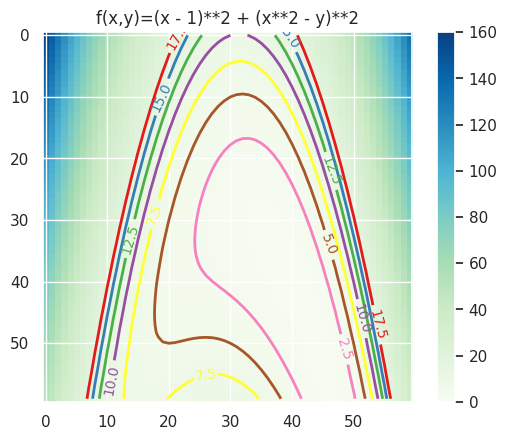

In [8]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

 
x_range = arange(-3.0,3.0,0.1)
y_range = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x_range, y_range) # grid of point
Z=np.zeros((len(X),len(X[0])))
for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i][j]=(sympy2def(f))(X[i][j], Y[i][j])
 # evaluation of the function on the grid

im = imshow(Z,cmap=cm.GnBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(0,20,2.5),linewidths=2,cmap=cm.Set1_r)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('f(x,y)='+str(f))
show()

# Градиентный спуск с постоянным шагом

In [9]:
def simple_gradient_descend(f,start_pos,eps,step_len,steps_lim=500):
    Xs=[np.array(start_pos)]
    diff_f_x=sympy.diff(f,x)
    diff_f_y=sympy.diff(f,y)
    grad_norms=[]
    grad=-np.array([
        float(diff_f_x.subs({'x':Xs[-1][0],'y':Xs[-1][1]})),
        float(diff_f_y.subs({'x':Xs[-1][0],'y':Xs[-1][1]}))
    ])
    steps=0
    while norm(grad)>=eps and steps<steps_lim:
        grad_norms.append(norm(grad))
        steps+=1
        C=step_len/norm(grad)
        #C=step_len
        Xs.append(Xs[-1] + C*grad)
        grad=-np.array([
            float(diff_f_x.subs({'x':Xs[-1][0],'y':Xs[-1][1]})),
            float(diff_f_y.subs({'x':Xs[-1][0],'y':Xs[-1][1]}))
        ])
    return Xs,steps, (sympy2def(f))(Xs[-1][0],Xs[-1][1]), grad_norms


In [10]:
history,steps,min_val,grad_norms=simple_gradient_descend(f,start_pos=(0.5,0.5),eps=0.1,step_len=0.02)

In [11]:
print(f'{steps=}, {min_val=}, coordinate={history[-1]}')

steps=30, min_val=0.0108925776262458, coordinate=[0.90465978 0.77594969]


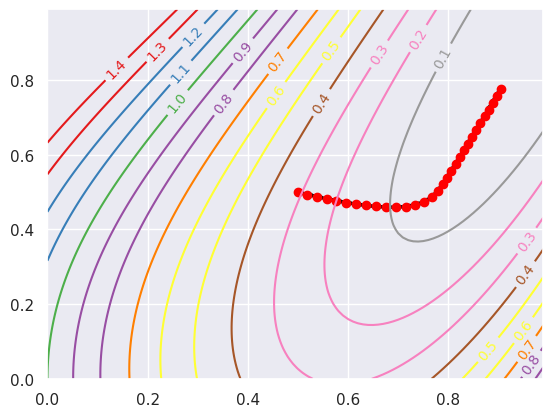

In [12]:
_hist=np.array(history).transpose()



x_range = arange(-0,1,0.01)
y_range = arange(-0,1,0.01)
X,Y = meshgrid(x_range, y_range) # grid of point
Z=np.zeros((len(X),len(X[0])))
for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i][j]=(sympy2def(f))(X[i][j], Y[i][j])
 # evaluation of the function on the grid

# adding the Contour lines with labels
cset = contour(x_range,y_range,Z,arange(0,1.5,0.1),linewidths=1.5,cmap=cm.Set1_r)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)




for i in range(1,len(_hist[0])):
    plt.arrow(_hist[0][i-1],_hist[1][i-1],_hist[0][i]-_hist[0][i-1],_hist[1][i]-_hist[1][i-1],
          shape='full', color='black', head_width=0.01, head_length=0.015,length_includes_head=True)

plt.scatter(_hist[0],_hist[1],color='red')
plt.show()

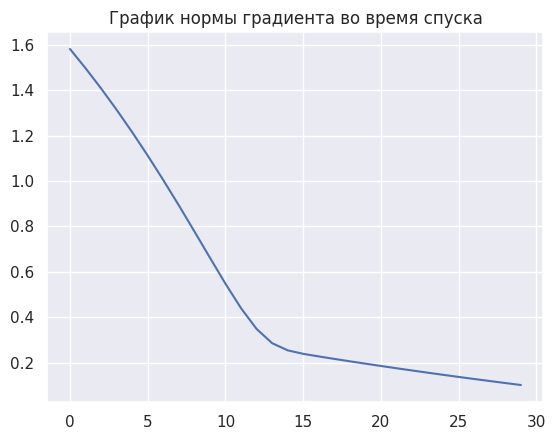

In [13]:
space = np.arange(len(grad_norms))
plt.plot(space,grad_norms)
plt.title('График нормы градиента во время спуска')
plt.show()

# Метод наискорейшего спуска

In [14]:
def fastest_gradient_descend(f,start_pos,eps,steps_lim=100):
    Xs=[np.array(start_pos)]
    diff_f_x=sympy.diff(f,x)
    diff_f_y=sympy.diff(f,y)
    grad_norms=[]
    global grad
    grad=-np.array([
        float(diff_f_x.subs({'x':Xs[-1][0],'y':Xs[-1][1]})),
        float(diff_f_y.subs({'x':Xs[-1][0],'y':Xs[-1][1]}))
    ])
    steps=0
    while norm(grad)>=eps and steps<steps_lim:
        grad_norms.append(norm(grad))
        steps+=1
        fi=lambda C:(sympy2def(f))((Xs[-1] + C*grad)[0], (Xs[-1] + C*grad)[1])
        C_best=find_min_1D(0,10,fi,eps)
        #C=step_len
        Xs.append(Xs[-1] + C_best*grad)
        grad=-np.array([
            float(diff_f_x.subs({'x':Xs[-1][0],'y':Xs[-1][1]})),
            float(diff_f_y.subs({'x':Xs[-1][0],'y':Xs[-1][1]}))
        ])
    return Xs,steps,(sympy2def(f))(Xs[-1][0],Xs[-1][1]), grad_norms

In [15]:
history,steps,min_val,grad_norms=fastest_gradient_descend(f,start_pos=(0.2,-0.1),eps=0.1)

In [16]:
print(f'{steps=}, {min_val=}, coordinate={history[-1]}')

steps=11, min_val=0.00671468858015860, coordinate=[0.92210826 0.82483633]


In [17]:
history

[array([ 0.2, -0.1]),
 array([ 0.54875 , -0.034375]),
 array([0.71741898, 0.64711255]),
 array([0.79126053, 0.62642152]),
 array([0.82395725, 0.62637023]),
 array([0.86589586, 0.65099616]),
 array([0.84857023, 0.69729904]),
 array([0.86619239, 0.70085723]),
 array([0.91888086, 0.75492351]),
 array([0.90587917, 0.76889515]),
 array([0.90633112, 0.825466  ]),
 array([0.92210826, 0.82483633])]

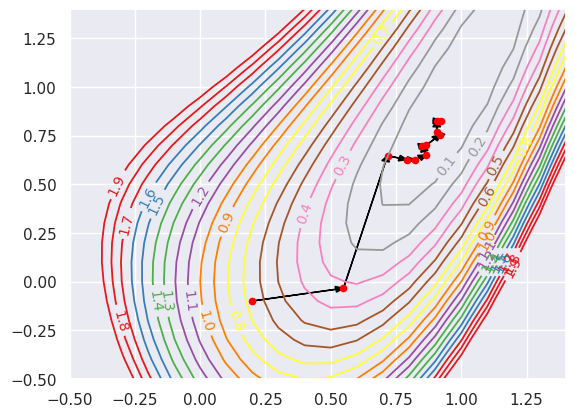

In [20]:
_hist=np.array(history).transpose()



x_range = arange(-0.5,1.5,0.1)
y_range = arange(-0.5,1.5,0.1)
X,Y = meshgrid(x_range, y_range) # grid of point
Z=np.zeros((len(X),len(X[0])))
for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i][j]=(sympy2def(f))(X[i][j], Y[i][j])
 # evaluation of the function on the grid

# adding the Contour lines with labels
cset = contour(x_range,y_range,Z,arange(0,2,0.1),linewidths=1.3,cmap=cm.Set1_r)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)




for i in range(1,len(_hist[0])):
    plt.arrow(_hist[0][i-1],_hist[1][i-1],_hist[0][i]-_hist[0][i-1],_hist[1][i]-_hist[1][i-1],
          shape='full', color='black', head_width=0.03, head_length=0.03,length_includes_head=True)

plt.scatter(_hist[0],_hist[1],color='red',s=20)
plt.show()

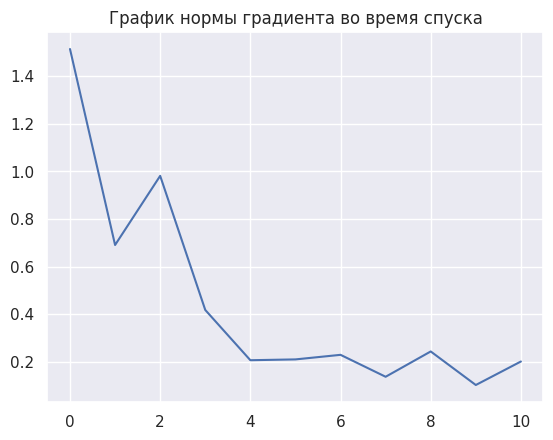

In [19]:
space = np.arange(len(grad_norms))
plt.plot(space,grad_norms)
plt.title('График нормы градиента во время спуска')
plt.show()

# Метод дробления шага 

In [187]:
def gradient_descend_step_fragmentation(f,start_pos,eps,step_len,steps_lim=500):
    Xs=[np.array(start_pos)]
    diff_f_x=sympy.diff(f,x)
    diff_f_y=sympy.diff(f,y)
    grad_norms=[]
    global grad
    grad=-np.array([
        float(diff_f_x.subs({'x':Xs[-1][0],'y':Xs[-1][1]})),
        float(diff_f_y.subs({'x':Xs[-1][0],'y':Xs[-1][1]}))
    ])
    steps=0
    while norm(grad)>=eps and steps<steps_lim:
        grad_norms.append(norm(grad))
        steps+=1
        C=step_len/norm(grad)/np.sqrt(steps)
        #C=step_len
        Xs.append(Xs[-1] + C*grad)
        grad=-np.array([
            float(diff_f_x.subs({'x':Xs[-1][0],'y':Xs[-1][1]})),
            float(diff_f_y.subs({'x':Xs[-1][0],'y':Xs[-1][1]}))
        ])
    return Xs,steps, (sympy2def(f))(Xs[-1][0],Xs[-1][1]),grad_norms

In [188]:
history,steps,min_val,grad_norms=gradient_descend_step_fragmentation(f,start_pos=(0.2,-0.1),step_len=0.5,eps=0.1)

In [189]:
print(f'{steps=}, {min_val=}, coordinate={history[-1]}')

steps=273, min_val=0.000420673251272413, coordinate=[1.00717611 0.99518974]


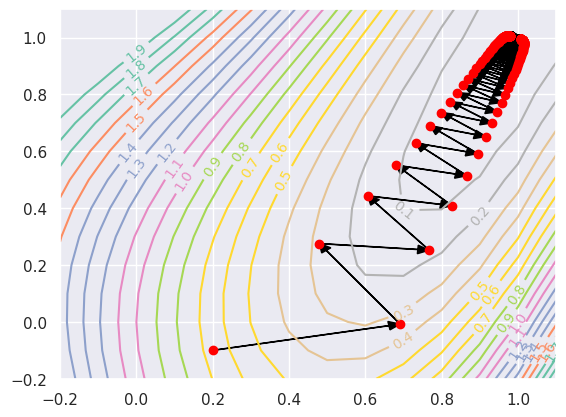

In [190]:
_hist=np.array(history).transpose()



x_range = arange(-0.2,1.2,0.1)
y_range = arange(-0.2,1.2,0.1)
X,Y = meshgrid(x_range, y_range) # grid of point
Z=np.zeros((len(X),len(X[0])))
for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i][j]=(sympy2def(f))(X[i][j], Y[i][j])
 # evaluation of the function on the grid

# adding the Contour lines with labels
cset = contour(x_range,y_range,Z,arange(0,2,0.1),linewidths=1.5,cmap=cm.Set2_r)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)




for i in range(1,len(_hist[0])):
    plt.arrow(_hist[0][i-1],_hist[1][i-1],_hist[0][i]-_hist[0][i-1],_hist[1][i]-_hist[1][i-1],
          shape='full', color='black', head_width=0.03, head_length=0.03,length_includes_head=True)

plt.scatter(_hist[0],_hist[1],color='red')
plt.show()

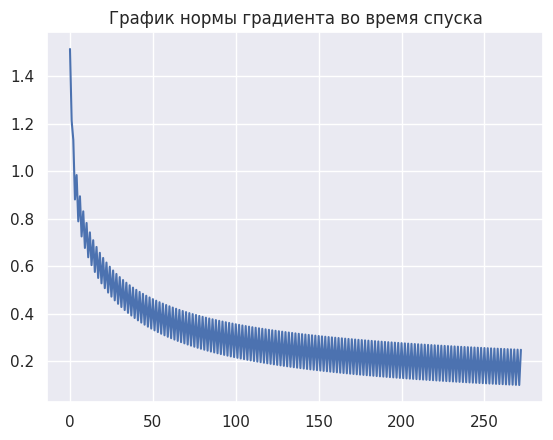

In [191]:
space = np.arange(len(grad_norms))
plt.plot(space,grad_norms)
plt.title('График нормы градиента во время спуска')
plt.show()